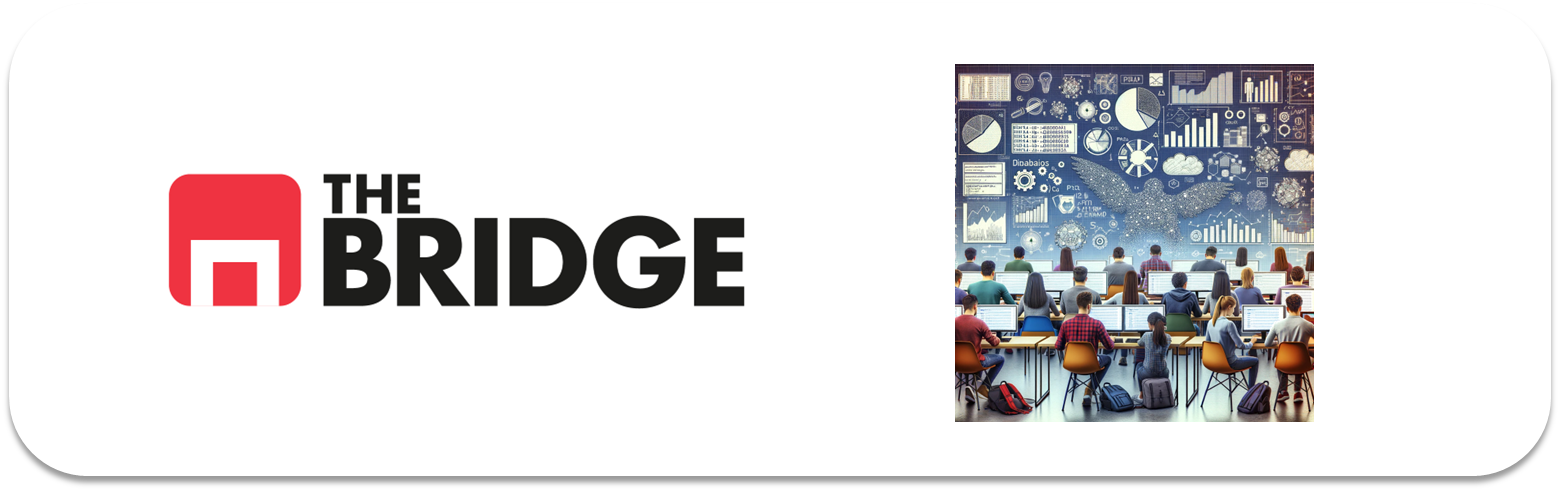

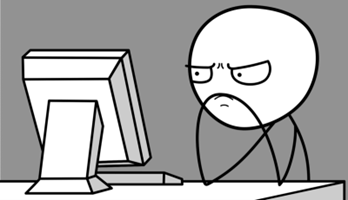

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [4]:
data = pd.read_csv("./data/advertising_ml.csv")

print(data.info())
print(data.head())
print(data.isnull().sum())
print("\nNúmero de filas duplicadas:", data.duplicated().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB
None
   Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     68.95  35 years     61833.90                256.09   
1             

In [6]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30 years,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45 años,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51 years,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19 years,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

El problema que estamos tratando es un problema de clasificación binaria, donde queremos predecir si un usuario hará clic en el enlace de un anuncio o no. En términos generales, estamos interesados en entender el comportamiento del usuario en relación con los anuncios y si es probable que realicen una acción específica, en este caso, hacer clic en el anuncio.

En cuanto al tipo de aprendizaje, estamos abordando un problema de aprendizaje supervisado, ya que contamos con un conjunto de datos etiquetado donde conocemos la variable objetivo (target), que en este caso es "Clicked on Ad", que indica si un usuario hizo clic en el anuncio o no.

Por lo tanto, la variable target (o variable dependiente) que podemos identificar rápidamente es "Clicked on Ad", ya que es la que queremos predecir. Esta variable será nuestra etiqueta de clasificación, y nuestro objetivo será construir un modelo predictivo que pueda tomar características de los usuarios (variables independientes) y predecir si harán clic en el anuncio o no.

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [7]:
# Definición de las columnas y su cardinalidad
column_definitions = {
    "Daily Time Spent on Site": {"definition": "Tiempo diario que un usuario pasa en el sitio web (en minutos)"},
    "Age": {"definition": "Edad del usuario"},
    "Area Income": {"definition": "Ingreso promedio en el área del usuario"},
    "Daily Internet Usage": {"definition": "Uso diario de Internet por parte del usuario (en minutos)"},
    "Ad Topic Line": {"definition": "Línea temática del anuncio"},
    "City": {"definition": "Ciudad del usuario"},
    "Male": {"definition": "Variable binaria que indica si el usuario es hombre (1 si es hombre, 0 si es mujer)"},
    "Country": {"definition": "País del usuario"},
    "Timestamp": {"definition": "Marca de tiempo del registro"},
    "Clicked on Ad": {"definition": "Variable binaria que indica si el usuario hizo clic en el anuncio (1 si hizo clic, 0 si no hizo clic)"}
}

# Clasificar las columnas en categóricas o numéricas
categorical_columns = []
numeric_columns = []

for column_name, column_info in column_definitions.items():
    if data[column_name].dtype == "object" or data[column_name].nunique() <= 10:
        categorical_columns.append(column_name)
    else:
        numeric_columns.append(column_name)

# Mostrar la clasificación de las columnas
print("\nColumnas categóricas:")
for column in categorical_columns:
    print(f"{column}: {column_definitions[column]['definition']}")

print("\nColumnas numéricas:")
for column in numeric_columns:
    print(f"{column}: {column_definitions[column]['definition']}")


Columnas categóricas:
Age: Edad del usuario
Ad Topic Line: Línea temática del anuncio
City: Ciudad del usuario
Male: Variable binaria que indica si el usuario es hombre (1 si es hombre, 0 si es mujer)
Country: País del usuario
Timestamp: Marca de tiempo del registro
Clicked on Ad: Variable binaria que indica si el usuario hizo clic en el anuncio (1 si hizo clic, 0 si no hizo clic)

Columnas numéricas:
Daily Time Spent on Site: Tiempo diario que un usuario pasa en el sitio web (en minutos)
Area Income: Ingreso promedio en el área del usuario
Daily Internet Usage: Uso diario de Internet por parte del usuario (en minutos)


### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [10]:
# Eliminar columnas irrelevantes
data_cleaned = data.drop(columns=["Timestamp"])

# Eliminar filas con valores nulos en las columnas relevantes
relevant_columns = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Ad Topic Line", "City", "Male", "Country", "Clicked on Ad"]
data_cleaned = data_cleaned.dropna(subset=relevant_columns)

# Verificar si hay filas duplicadas y eliminarlas si es necesario
data_cleaned = data_cleaned.drop_duplicates()

# Verificar la forma del conjunto de datos limpio
print("Forma del conjunto de datos después de la limpieza:", data_cleaned.shape)


Forma del conjunto de datos después de la limpieza: (1000, 9)


### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [11]:
# Definir las características (X) y la variable objetivo (y)
X = data_cleaned.drop(columns=["Clicked on Ad"])
y = data_cleaned["Clicked on Ad"]

# Dividir el conjunto de datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos divididos
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Forma de las etiquetas de prueba (y_test):", y_test.shape)


Forma del conjunto de entrenamiento (X_train): (800, 8)
Forma del conjunto de prueba (X_test): (200, 8)
Forma de las etiquetas de entrenamiento (y_train): (800,)
Forma de las etiquetas de prueba (y_test): (200,)


### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

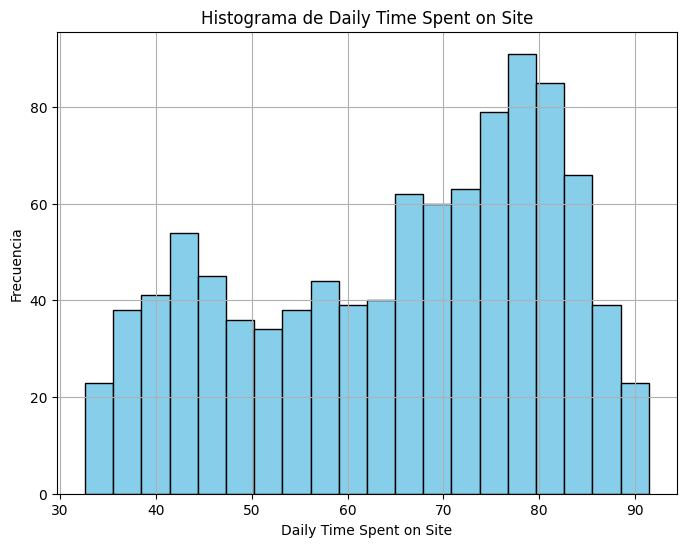

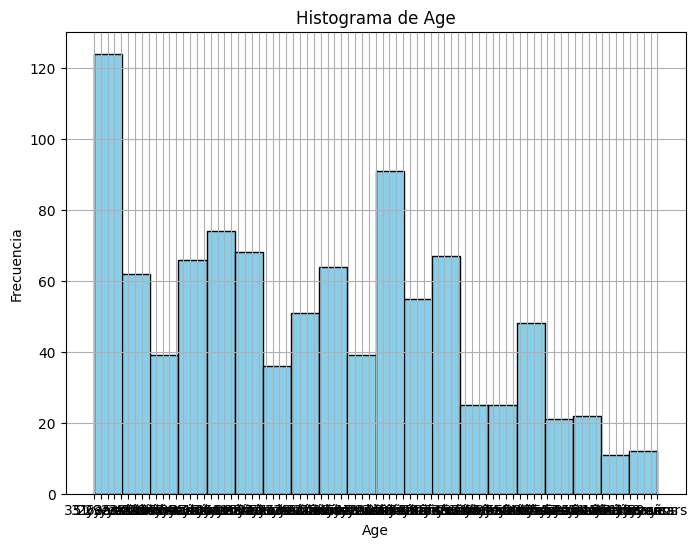

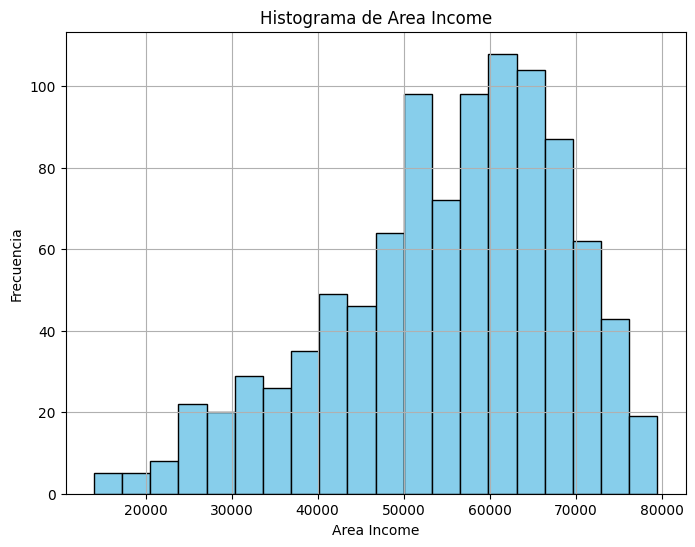

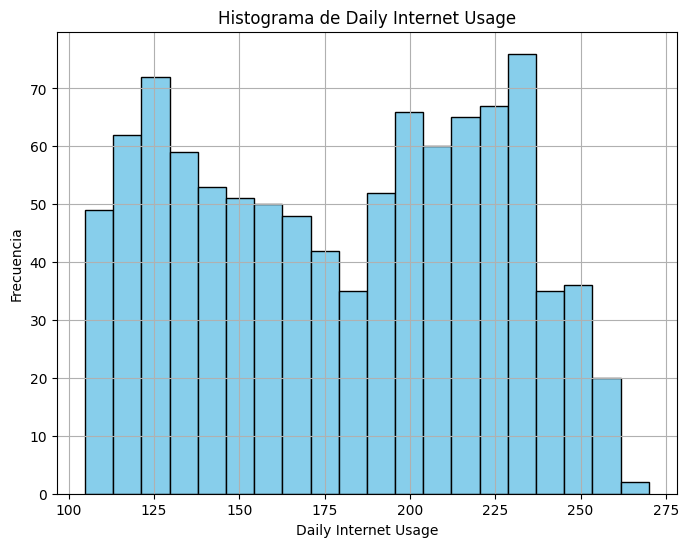

In [13]:
# Seleccionar columnas numéricas
numeric_columns = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

# Mostrar histogramas de las columnas numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data_cleaned[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

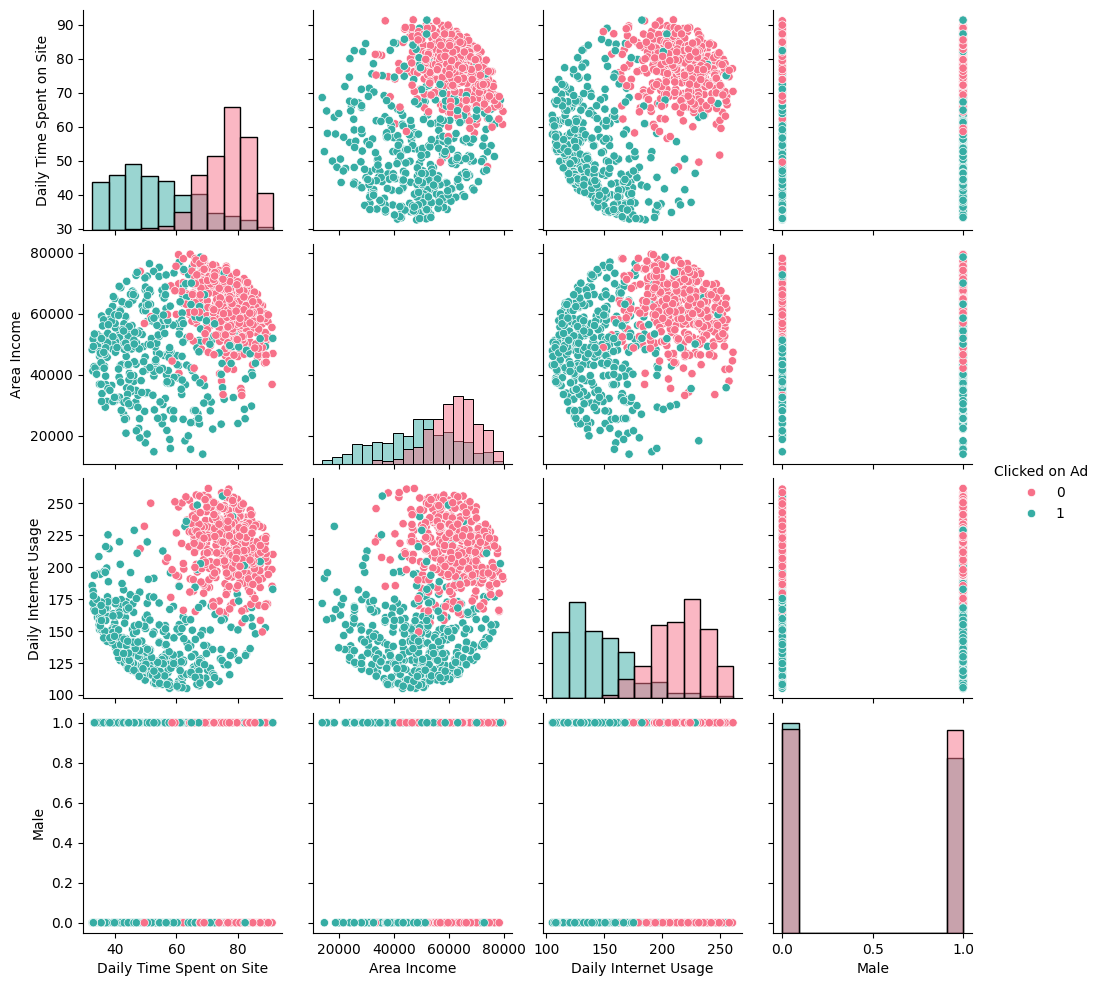

In [15]:
# Concatenar el conjunto de características y la variable objetivo para el conjunto de entrenamiento
train_data = pd.concat([X_train, y_train], axis=1)

# Crear el PairPlot con la variable objetivo codificada por color
sns.pairplot(train_data, hue="Clicked on Ad", palette="husl", diag_kind='hist')
plt.show()


### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [16]:
# Seleccionar las características relevantes
selected_features = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

# Crear un nuevo DataFrame solo con las características seleccionadas y la variable objetivo
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Verificar las formas de los nuevos conjuntos de características
print("Forma del conjunto de entrenamiento seleccionado:", X_train_selected.shape)
print("Forma del conjunto de prueba seleccionado:", X_test_selected.shape)

Forma del conjunto de entrenamiento seleccionado: (800, 4)
Forma del conjunto de prueba seleccionado: (200, 4)
